In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import ticker


In the above equations, θ is the astrometric signal of a planet. If we take the mass of the planet to be “mp” orbiting a star with mass “m⋆” and assume a circular orbit and that mp ≪ m⋆. At a distance “d” from the observer and a radius “a,” the astrometric signal, θ equals...

signal = 3 micro-as * (m_p/m_earth)*(m_star/m_sun)^(-2/3)*(P/year)^(2/3)*(d/pc)^(-1)

In [20]:
planets = [r'M$_{\rm Earth}$, P$_{\rm Earth}$ / 10', 
           r'M$_{\rm Earth}$, P$_{\rm Earth}$', 
           r'M$_{\rm Earth}$, 10 P$_{\rm Earth}$',  
           r'M$_{\rm Jupiter}$, P$_{\rm Jupiter}$ / 10', 
           r'M$_{\rm Jupiter}$, P$_{\rm Jupiter}$', 
           r'M$_{\rm Jupiter}$, 10 P$_{\rm Jupiter}$',
           r'M$_{\rm Saturn}$, P$_{\rm Saturn}$ / 10', 
           r'M$_{\rm Saturn}$, P$_{\rm Saturn}$', 
           r'M$_{\rm Saturn}$, 10 P$_{\rm Saturn}$']

colors = ['#366537', '#366537', '#366537', 
          '#db372b', '#db372b', '#db372b',
          '#b4943e', '#b4943e', '#b4943e']
linestyles = ['dotted', 'solid', (0, (3, 1, 1, 1, 1, 1)), 
              'dotted', 'solid', (0, (3, 1, 1, 1, 1, 1)),
              'dotted', 'solid', (0, (3, 1, 1, 1, 1, 1))]
m_p = [1, 1, 1, 
       317.83, 317.83, 317.83, 
       95.16, 95.16, 95.16]
period_astrometry = [.1, 1, 10, 
                     1.1862, 11.862, 118.62,
                     2.9457, 29.457, 294.57]
distance = np.linspace(.1, 1000, 1000)
m_s = 1




/var/folders/9z/bcj7jltn3x5_8y20r9cxql3h0000gn/T/ipykernel_24073/1982304998.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


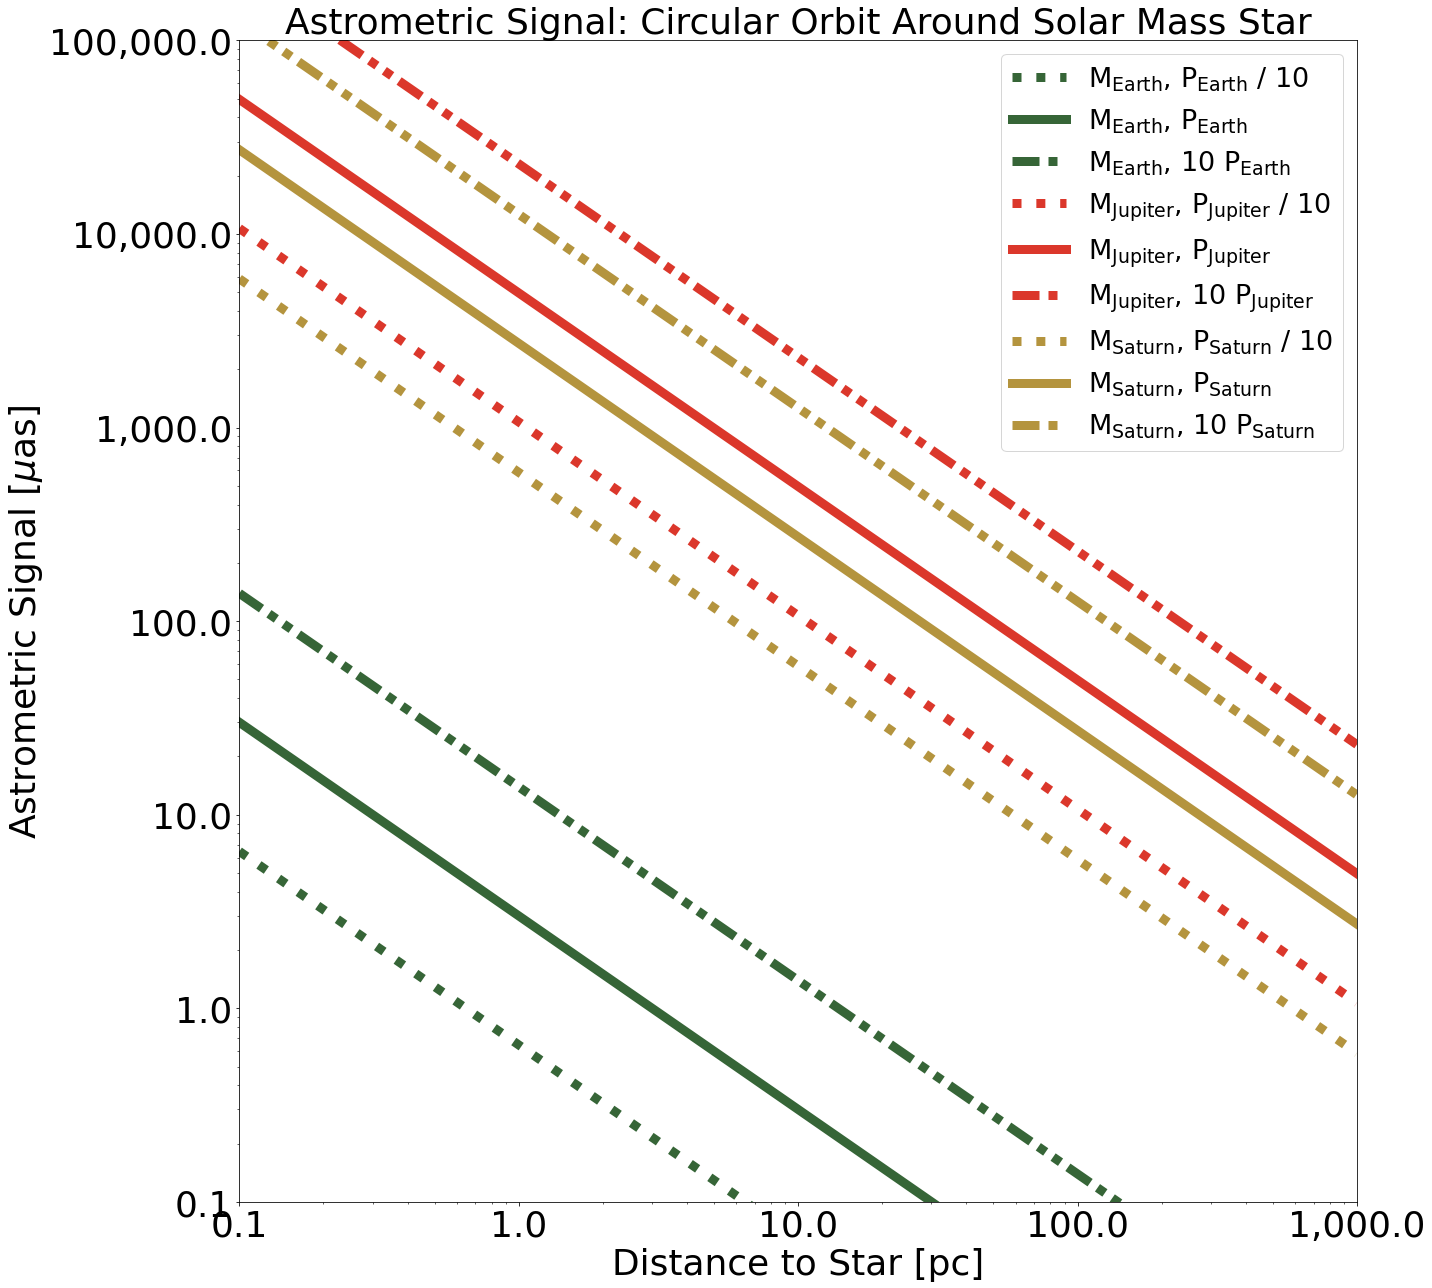

In [21]:
fig, ax = plt.subplots(figsize = [20, 18])
astrom_signals = []
for ii in range(0, len(planets)):
    astrometric_signal = 3 * (m_p[ii])*(m_s)**(-2/3)*(period_astrometry[ii])**(2/3)*(distance)**(-1)
    astrom_signals.append(astrometric_signal)
    ax.plot(distance, astrometric_signal, color = colors[ii], linewidth = 9, label = planets[ii], linestyle = linestyles[ii])

ax.set_yscale('log')
ax.set_xscale('log')

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format((x), ',')))

ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format((x), ',')))

ax.set_ylim(.1, 100000)
ax.set_xlim(.1, 1000)
plt.xticks(fontsize=36)
plt.yticks(fontsize=36)
ax.set_title('Astrometric Signal: Circular Orbit Around Solar Mass Star', fontsize = 36)
ax.set_ylabel(r'Astrometric Signal [$\mu$as]', fontsize = 36)
ax.set_xlabel('Distance to Star [pc]', fontsize = 36)


ax.legend(fontsize = 27)

fig.tight_layout()
fig.savefig('astrometric_signal.pdf')
fig.show()




In [22]:
G = 6.674*10**(-11) #m3⋅kg−1⋅s−2
m_solar_system = (5.97*10**24, 5.97*10**24, 5.97*10**24, 
                  1898*10**24, 1898*10**24, 1898*10**24,
                  568.32*10**24, 568.32*10**24, 568.32*10**24 ) #kg

m_s = 1.989*10**30 #kg
inclination = 90 #deg
periodRV = [ .1*3.154e+7, 1.*3.154e+7, 10.*3.154e+7, 
            1.1862*3.154e+7, 11.862*3.154e+7, 118.62*3.154e+7,
            2.9457*3.154e+7, 29.457*3.154e+7, 294.57*3.154e+7]


ecc = [0.017, 0.017, 0.017, 
       0.049, 0.049, 0.049,
       0.052, 0.052, 0.052]

markers = ['s', 'o', '*', 
           's', 'o', '*',
           's', 'o', '*']



/var/folders/9z/bcj7jltn3x5_8y20r9cxql3h0000gn/T/ipykernel_24073/774594542.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(mRV_planet[ii], K_solar_system, 'o', markersize = 45, color = colors[ii], label = planets[ii], marker = markers[ii])


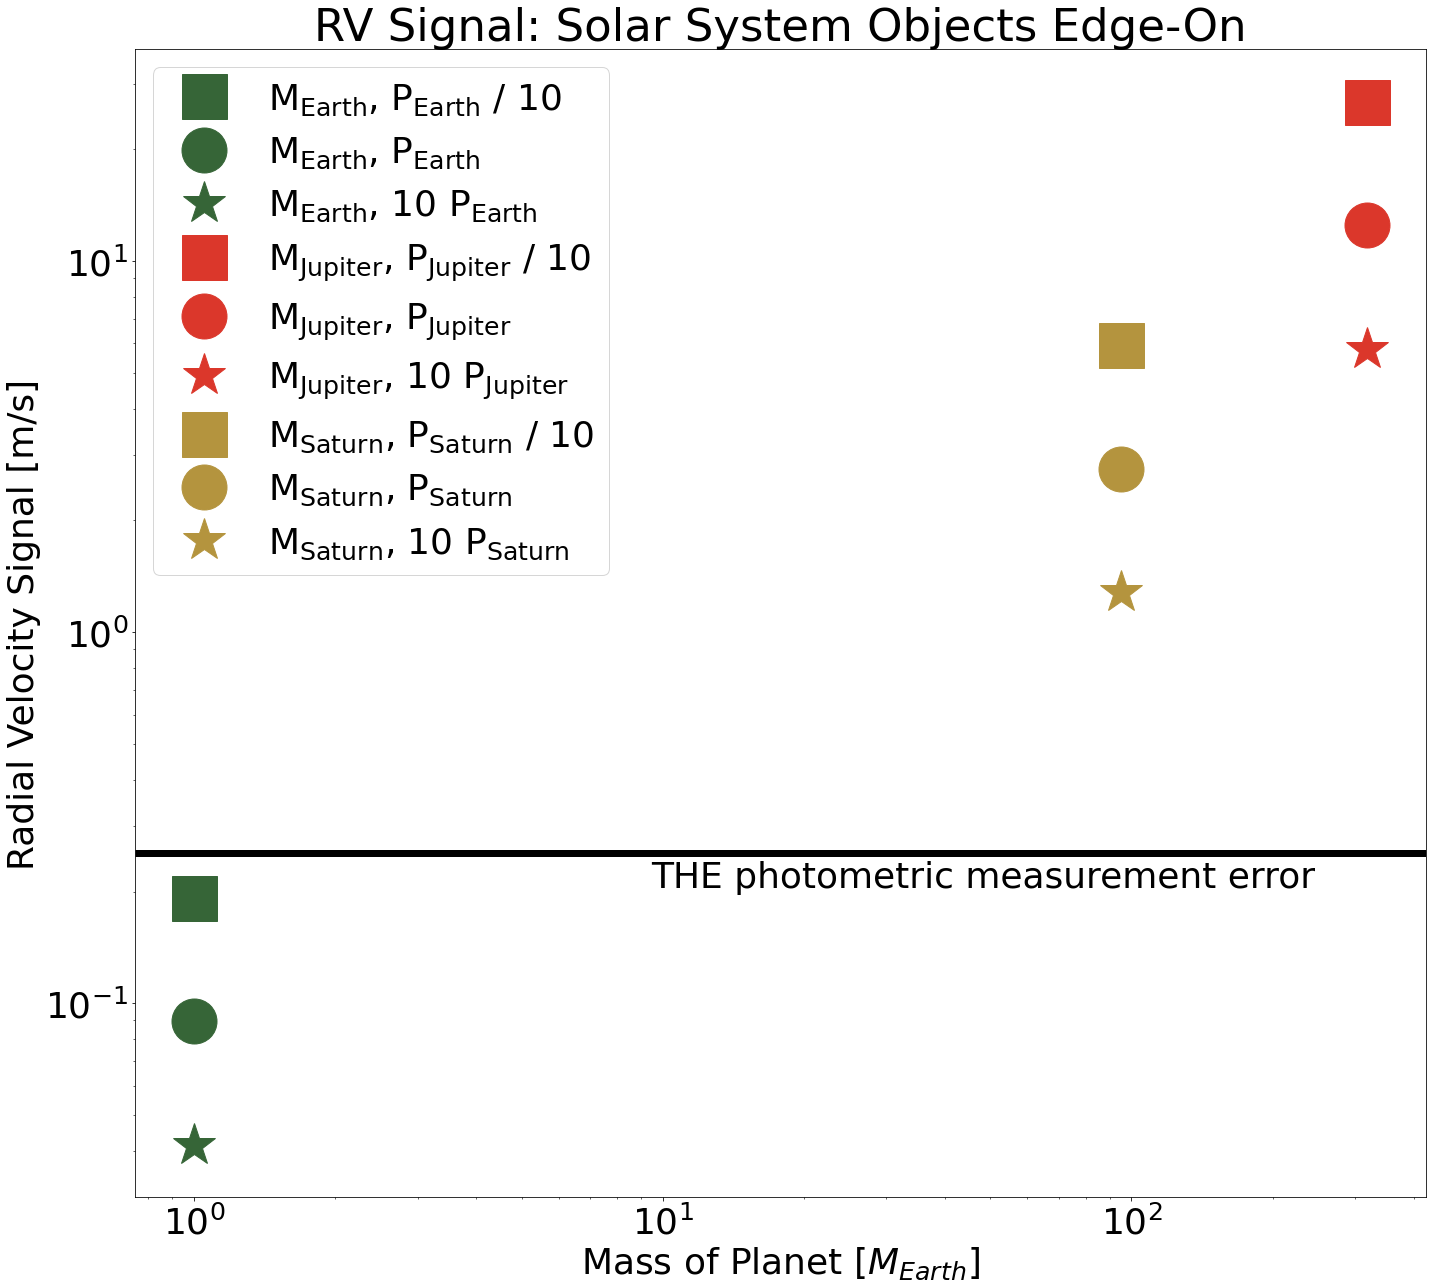

In [43]:
fig, ax = plt.subplots(figsize = [20, 18])
mRV_planet = np.array(m_solar_system)/(5.97*10**24)

RV_signals = []
for ii in range(0, len(planets)):
    K_solar_system = ((2*np.pi*G) / (periodRV[ii]))**(1/3) * (m_solar_system[ii]*np.sin(np.radians(inclination))/(m_s)**(2/3))*(1/(np.sqrt(1-ecc[ii]**2)))
    RV_signals.append(K_solar_system)
    plt.plot(mRV_planet[ii], K_solar_system, 'o', markersize = 45, color = colors[ii], label = planets[ii], marker = markers[ii])
    

plt.xticks(fontsize=36)
plt.yticks(fontsize=36)
plt.title('RV Signal: Solar System Objects Edge-On', fontsize = 45)
plt.ylabel(r'Radial Velocity Signal [m/s]', fontsize = 36)
plt.xlabel(r'Mass of Planet [$M_{Earth}$]', fontsize = 36)
plt.yscale('log')
plt.xscale('log')

plt.hlines(0.3, 0, 1, 'k', transform=ax.transAxes, lw=7)
plt.text(0.4, 0.27, 'THE photometric measurement error', transform=ax.transAxes, fontsize=36)

plt.legend(fontsize = 36, loc=2)


plt.tight_layout()
plt.savefig('rv_signal.pdf')
plt.show()

In [55]:
matplotlib.rc('xtick', labelsize=54) 
matplotlib.rc('ytick', labelsize=54) 

/var/folders/9z/bcj7jltn3x5_8y20r9cxql3h0000gn/T/ipykernel_24073/450114544.py:60: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


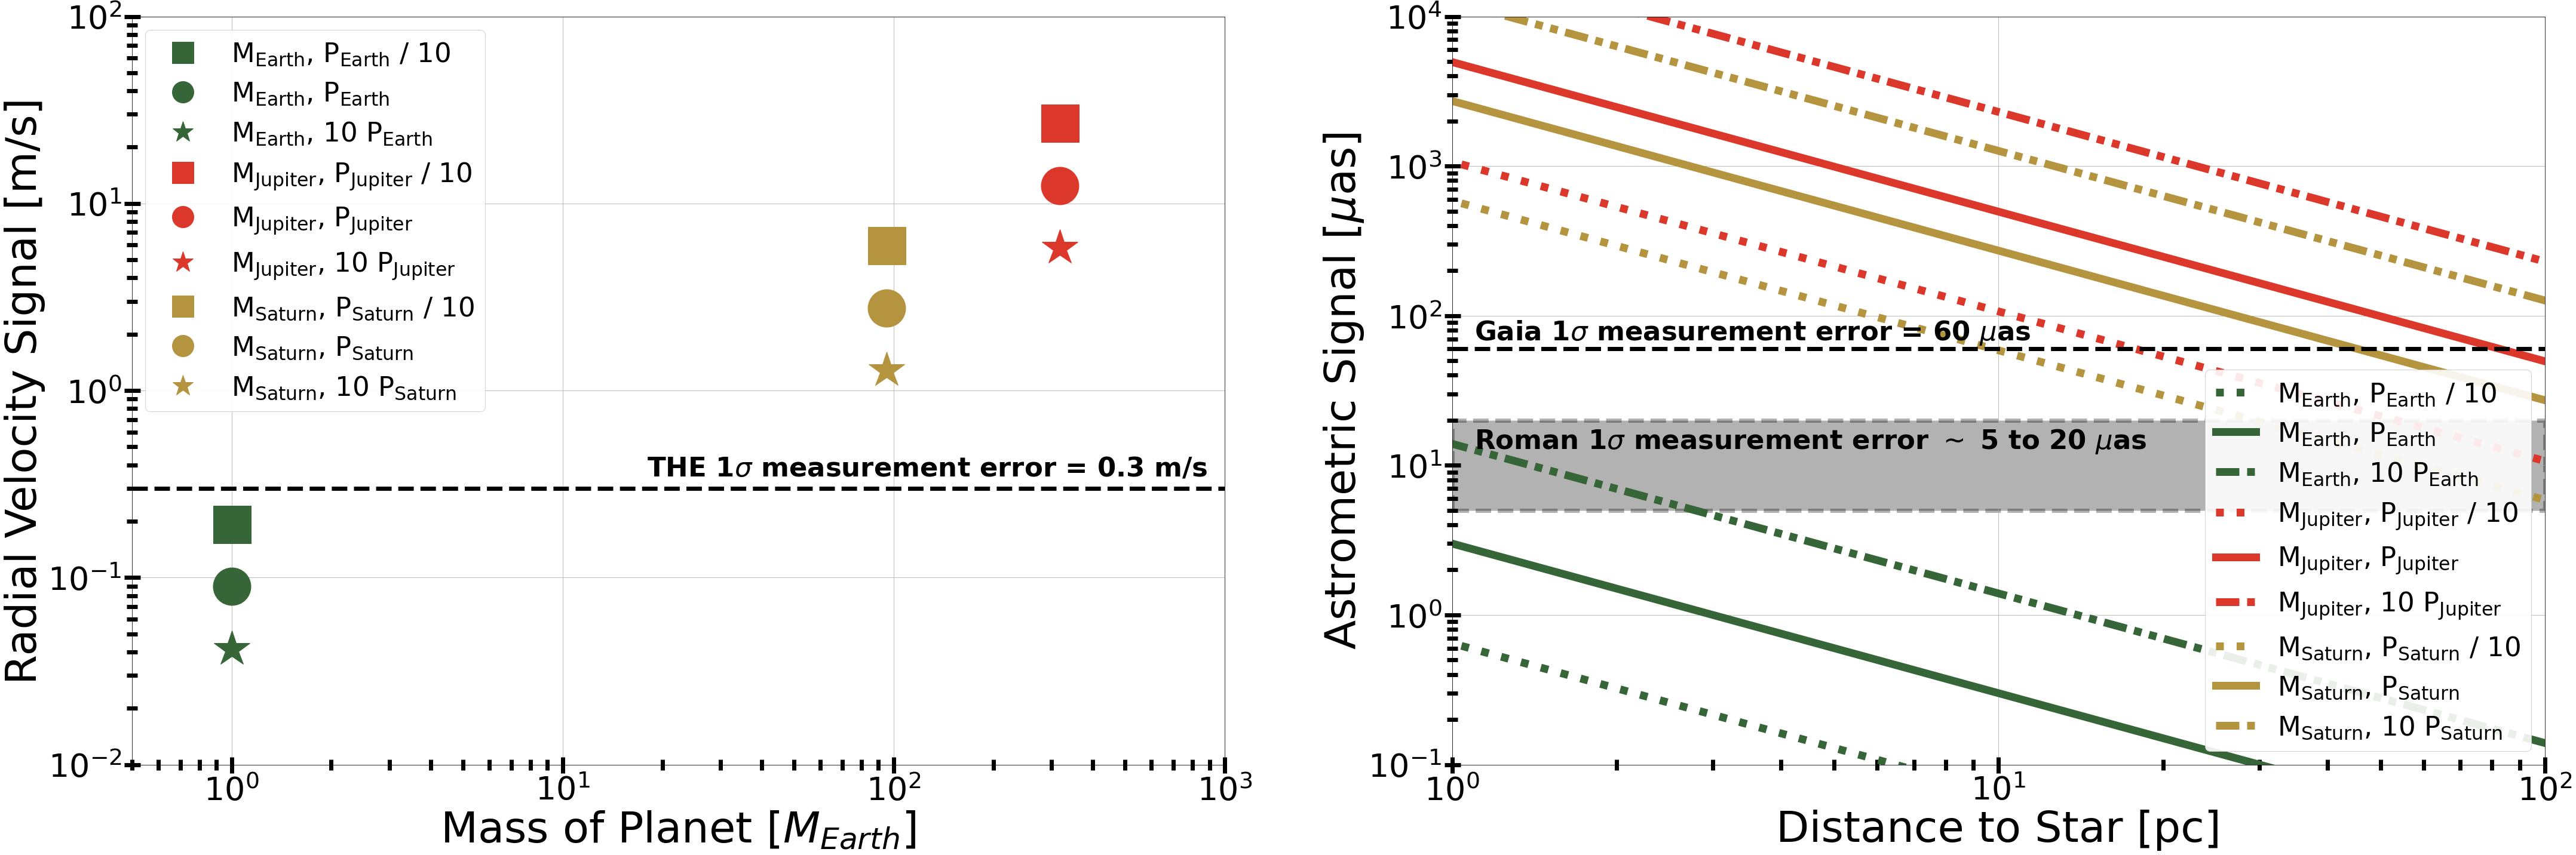

In [113]:
fig, ax = plt.subplots(1, 2, figsize = [60, 20])
fig.subplots_adjust(wspace=.25)


for ii in range(0, len(planets)):
    ax[0].plot(mRV_planet[ii], RV_signals[ii], markersize = 63, color = colors[ii], label = planets[ii], marker = markers[ii], ls='')
    ax[1].plot(distance, astrom_signals[ii], color = colors[ii], linewidth = 13, label = planets[ii], linestyle = linestyles[ii])



lgnd = ax[0].legend(fontsize = 45, framealpha = 0.9)
for ii in range(0, len(planets)):
    lgnd.legendHandles[ii]._legmarker.set_markersize(36)

#ax[0].set_title('RV Signal: Solar System Objects Edge-On', fontsize = 45)
ax[0].set_xlim(0.5, 1000)
ax[0].set_ylim(0.01, 100)
ax[0].set_ylabel(r'Radial Velocity Signal [m/s]', fontsize = 72)
ax[0].set_xlabel(r'Mass of Planet [$M_{Earth}$]', fontsize = 72)
ax[0].loglog()
ax[0].tick_params(axis='both', which='major', direction = 'inout', length = 27, width = 7)
ax[0].tick_params(axis='both', which='minor', direction = 'inout', length = 18, width = 7)
ax[0].grid(True)


ax[0].axhline(0.3, 0, 1, color='k', lw=7, ls='--')
ax[0].text(18., 0.35, r'THE 1$\sigma$ measurement error = 0.3 m/s', fontsize=45, fontweight='bold')








ax[1].loglog()
ax[1].set_ylim(.1, 10000)
ax[1].set_xlim(1, 100)
#ax[1].set_title('Astrometric Signal: Circular Orbit Around Solar Mass Star', fontsize = 45)
ax[1].set_ylabel(r'Astrometric Signal [$\mu$as]', fontsize = 72)
ax[1].set_xlabel('Distance to Star [pc]', fontsize = 72)

ax[1].legend(loc = 4, fontsize = 45, framealpha = 0.9, handlelength = 1.5)

ax[1].tick_params(axis='both', which='major', direction = 'inout', length = 27, width = 7)
ax[1].tick_params(axis='both', which='minor', direction = 'inout', length = 18, width = 7)
ax[1].grid(True) 


ax[1].axhline(60, 0, 1, color='k', lw=7, ls='--')
ax[1].text(1.1, 69, r'Gaia 1$\sigma$ measurement error = 60 $\mu$as', fontsize=45, fontweight='bold')

ax[1].axhspan(5, 20, 0, 1, color='k', lw=7, alpha=0.3, ls='--')
ax[1].text(1.1, 13, r'Roman 1$\sigma$ measurement error $\sim$ 5 to 20 $\mu$as', fontsize=45, fontweight='bold')



fig.tight_layout()
fig.savefig('envelope_calculations.pdf')
fig.show()